## Лабораторная работа 6. Использование внешних библиотек в ассемблере

Разработать программу на языке ассемблере с использованием библиотеки ncurses, в которой курсор перемещается по экрану в соответствии с заданным алгоритмом и оставляет за собой след заданного цвета, по достижению границы движение продолжается с начальной позиции с заполнением другим заданным цветом. Предусмотреть заданную клавишу выхода из программы, а также заданную клавишу, регулирующую скорость движения.

Алгоритм:  [4]
Цвета заполнения:  ['COLOR_MAGENTA', 'СOLOR_YELLOW']
Кнопки выхода, изменения скорости:  ['t', 'u']

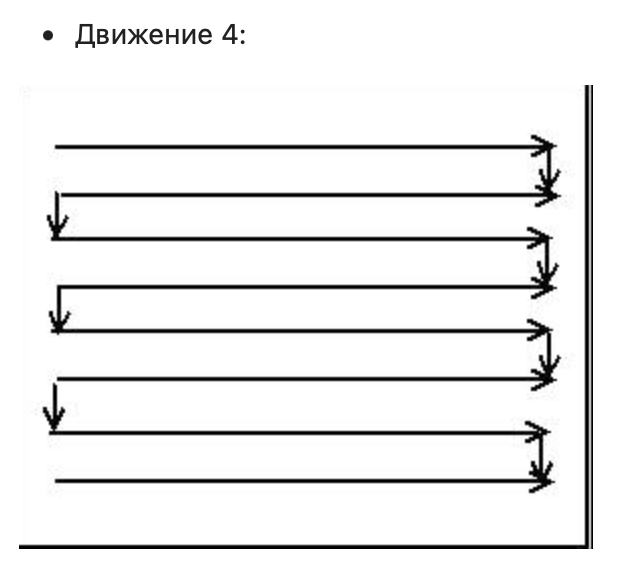

## Assemler code test

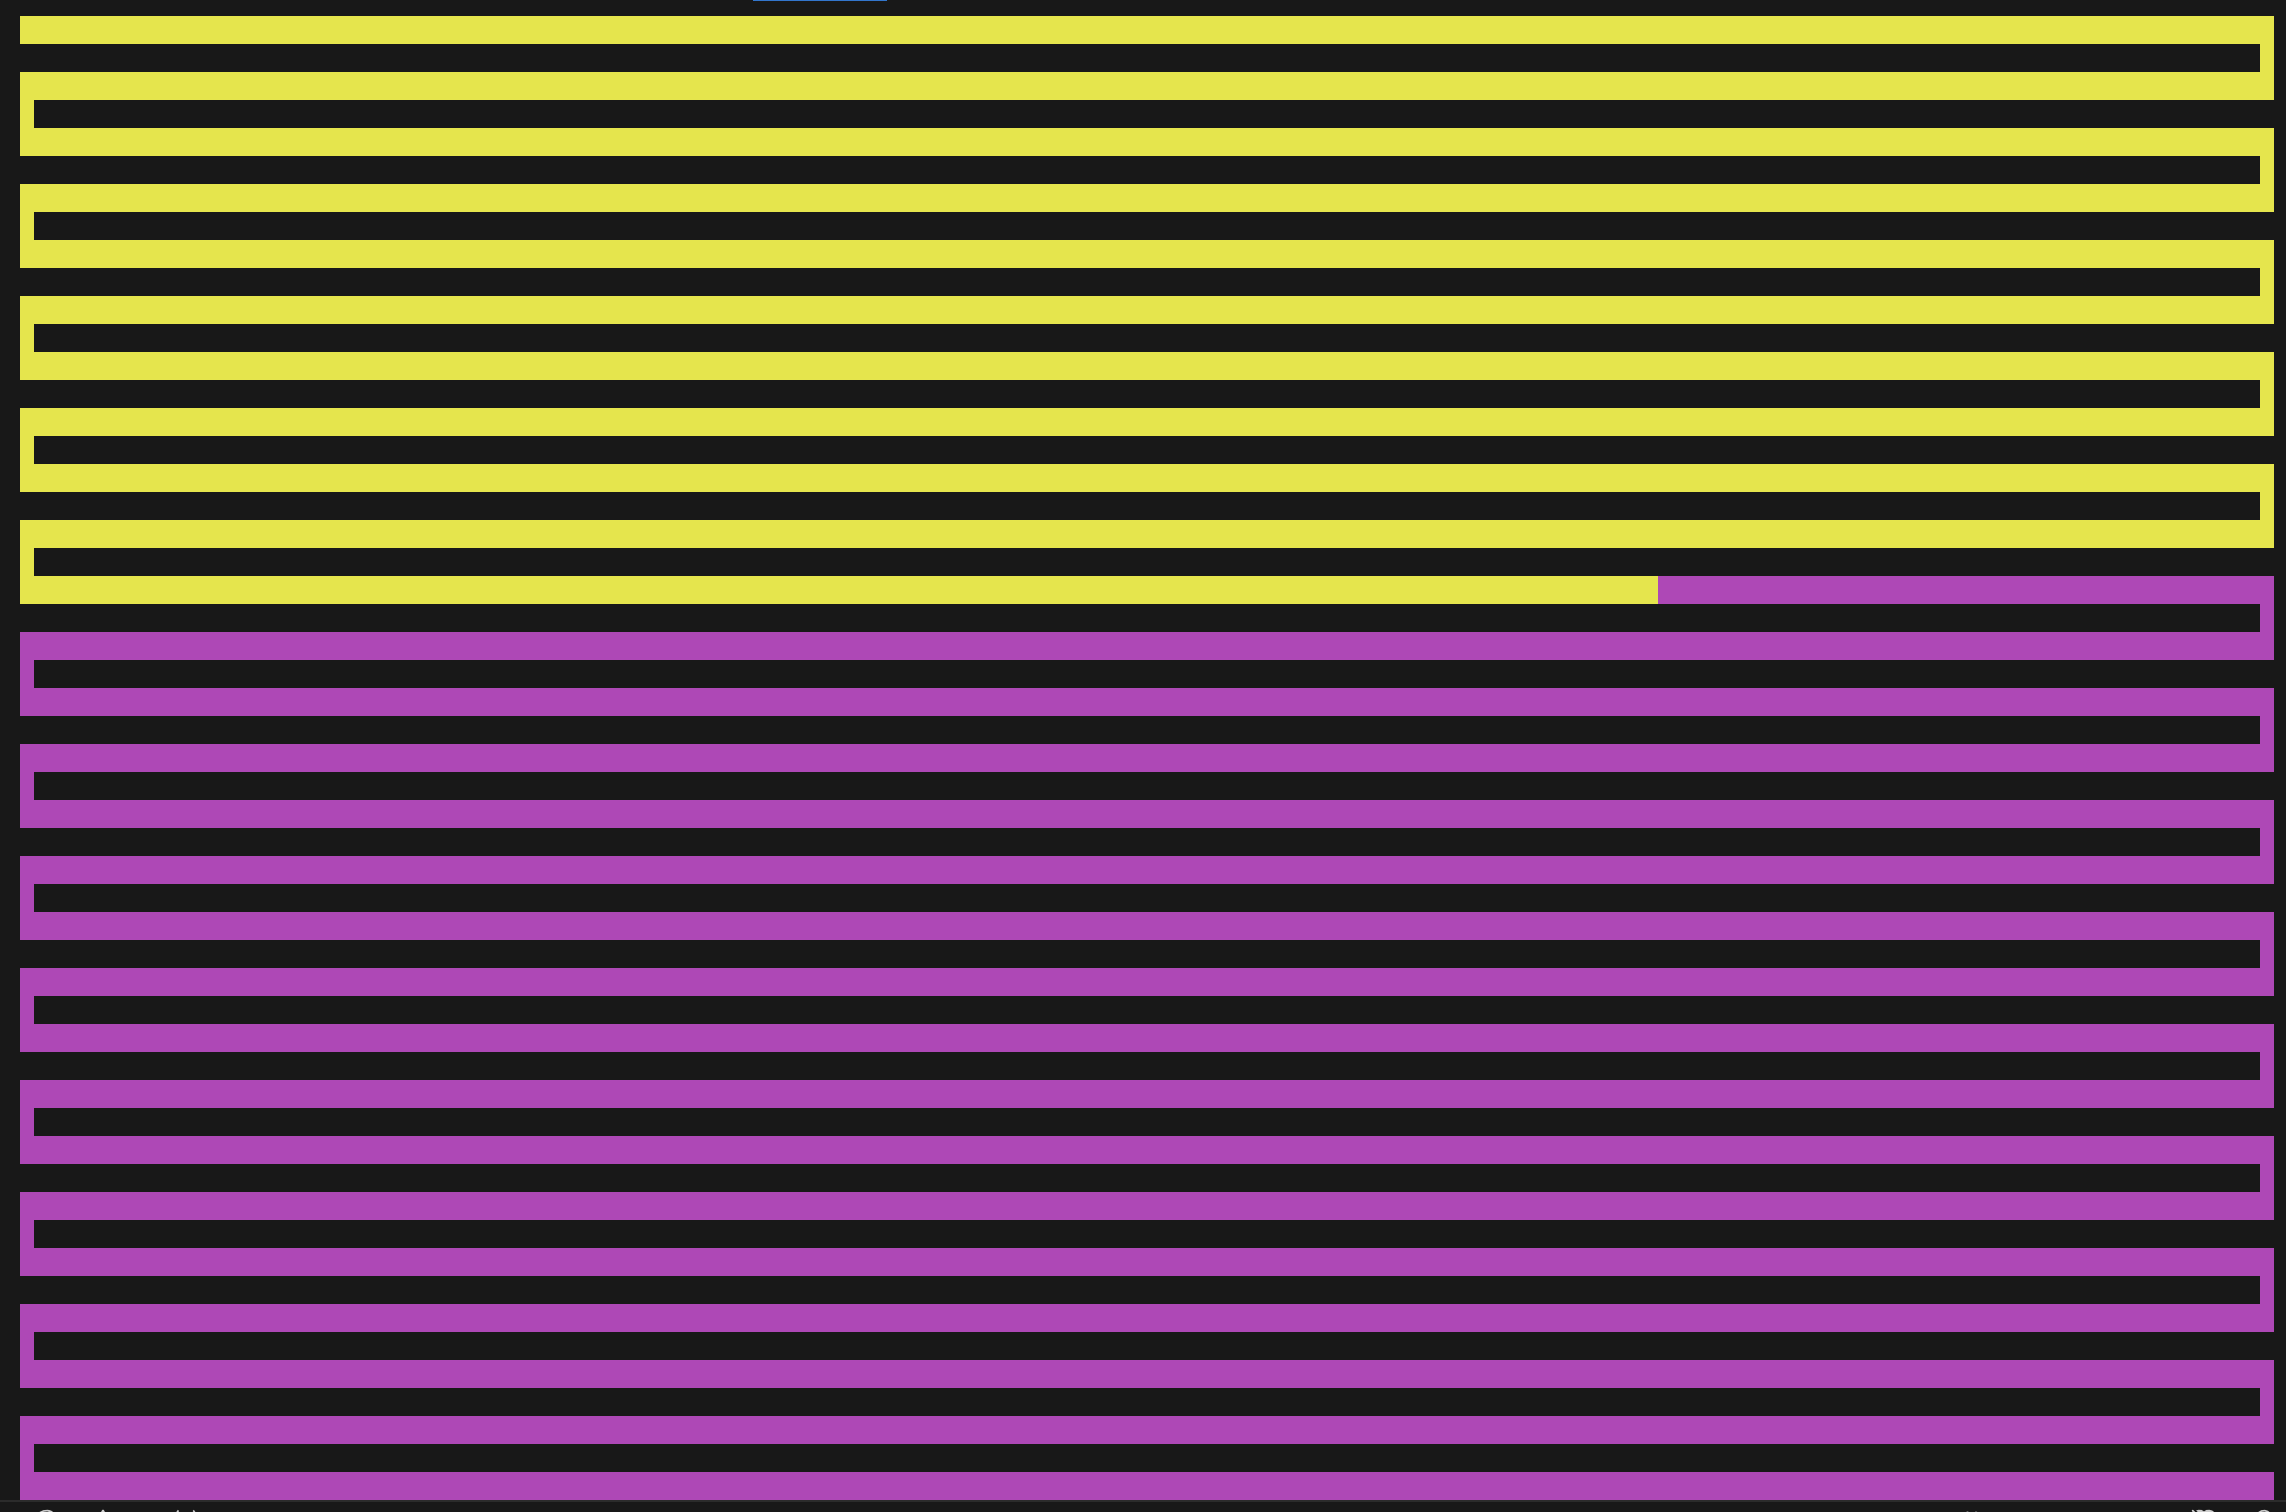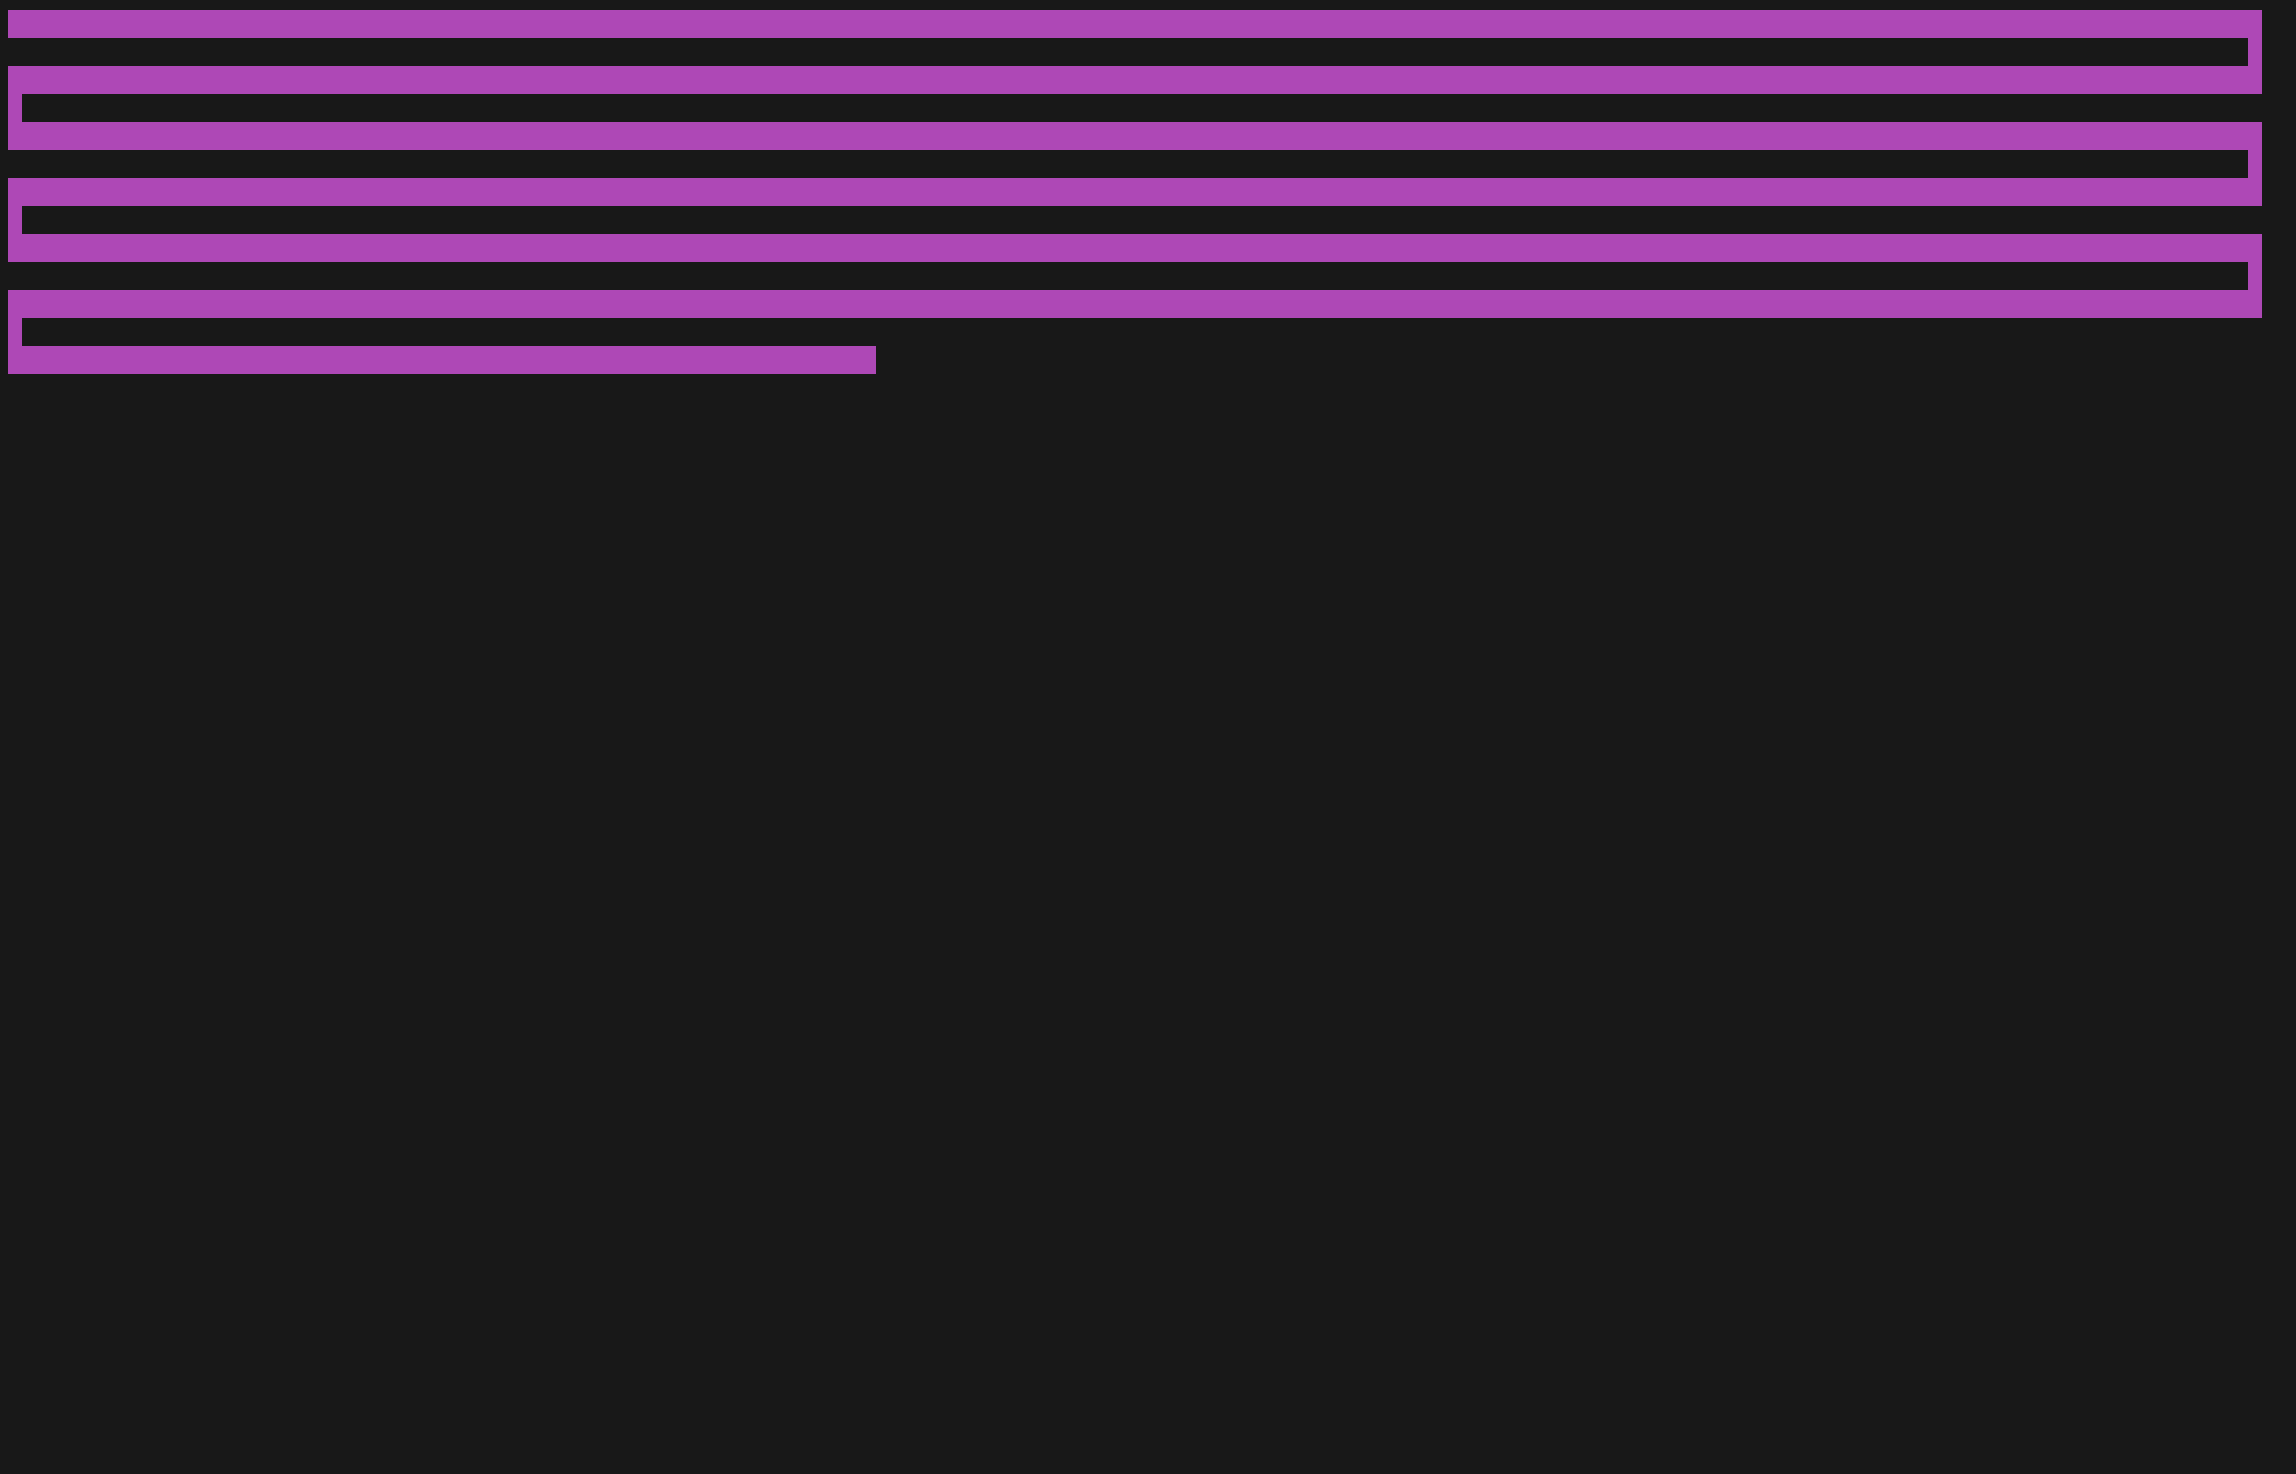

## Assemler code

```ASM
format ELF64

public _start

extrn curs_set
extrn initscr
extrn start_color
extrn init_pair
extrn getmaxx
extrn getmaxy
extrn raw
extrn noecho
extrn keypad
extrn stdscr
extrn move
extrn getch
extrn addch
extrn refresh
extrn endwin
extrn exit
extrn timeout
extrn usleep
extrn printw
extrn attron
extrn attroff
extrn bkgdset

section '.bss' writable
    xMax dq 1
    yMax dq 1
    char dq 1
    delay dq 10000
    currentPalette dq 1

section '.text' executable
_start:
    call initscr
    mov rdi, [stdscr]

    call getmaxx
    mov [xMax], rax

    call getmaxy
    mov [yMax], rax

    call start_color

    mov rdi, 1
    mov rsi, 7
    mov rdx, 5
    call init_pair

    mov rdi, 2
    mov rsi, 7
    mov rdx, 3
    call init_pair

    xor rdi, rdi
    call curs_set
    call refresh
    call noecho
    call raw

    mov rax, ' '
    mov [char], rax
    mov qword [currentPalette], 1

    printBegin:
    xor r15, r15  ; horizontal direction flag
    xor r14, r14 ; colour flag
    xor r8, r8   ; x
    xor r9, r9   ; y
    directionHorizontal:
        mov rsi, r8
        mov rdi, r9

        push r8
        push r9

        call move

        mov rdi, [currentPalette]
        shl rdi, 8
        call attron

        mov rdi, [char]
        call addch
        
        call refresh
        
        mov rdi, [delay]
        call usleep
        
        xor rdi, rdi
        call timeout
        call getch
        
        cmp rax, 't'
        je clearStack
        cmp rax, 'u'
        je toggleSpeed
        
        pop r9
        pop r8
        
        cmp r15, 0
        je .directionRight
        jmp .directionLeft

        .directionRight:
            inc r8
            cmp r8, [xMax]
            jl directionHorizontal
            dec r8
            jmp directionVertical
        
        .directionLeft:
            dec r8
            cmp r8, 0
            jge directionHorizontal
            inc r8

    directionVertical:
        mov rsi, r8
        inc r9
        mov rdi, r9

        push r8
        push r9

        call move
        
        mov rdi, [currentPalette]
        shl rdi, 8
        call attron

        mov rdi, [char]
        call addch
        
        call refresh
        
        mov rdi, [delay]
        call usleep
        
        mov rdi, 0
        call timeout
        call getch
        
        cmp rax, 't'
        je clearStack
        cmp rax, 'u'
        je toggleSpeed
        
        pop r9
        pop r8
        
        inc r9
        not r15
        cmp r9, [yMax]
        jl directionHorizontal
        mov rdi, qword [currentPalette]
        xor rdi, 3
        mov qword [currentPalette], rdi
        jmp printBegin

    toggleSpeed:
        pop r9
        pop r8
        cmp qword [delay], 10000
        jne setSlow
        mov qword [delay], 3000
        jmp directionHorizontal
    setSlow:
        mov qword [delay], 10000
        jmp directionHorizontal

clearStack:
    pop r9
    pop r8

return:
    call endwin
    mov rax, 60
    xor rdi, rdi
    syscall
